In [82]:
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn import datasets

In [72]:
df_boston = pd.DataFrame(X.data,columns=X.feature_names)
df_boston['target'] = pd.Series(X.target) > X.target.mean()
train, test = model_selection.train_test_split(df_boston, test_size=0.2)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,True
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,False
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,True
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,True
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,True


In [96]:
train_x, test_x = train.drop('target', axis=1), test.drop('target', axis=1)
train_y, test_y = train.target, test.target

dtrain = xgb.DMatrix(train_x, train_y)
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic'}
bst = xgb.train(param, dtrain)


preds = bst.predict(dtrain) > 0.5
train_error = 1 - (train_y == preds).sum() / len(train_y)
print('train error: {}'.format(train_error))

dtest = xgb.DMatrix(test_x)
preds = bst.predict(dtest) > 0.5
test_error = 1 - (test_y == preds).sum() / len(test_y)
print('test error: {}'.format(test_error))


train error: 0.04207920792079212
test error: 0.10784313725490191


ValueError: cannot reshape array of size 102 into shape (102,102)

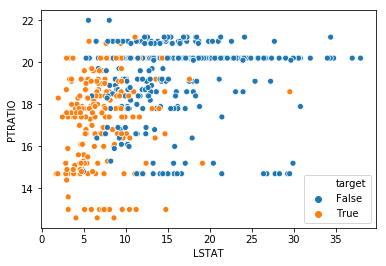

In [110]:
df_boston.head()


# plot probability contours
ax = sns.scatterplot(x='LSTAT',y='PTRATIO',hue='target',data=df_boston)
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
xx1 = np.linspace(x_min, x_max, 102)
xx2 = np.linspace(y_min, y_max, 102)
xx1, xx2 = np.meshgrid(xx1, xx2)

#means = test_x.mean()
#avg = pd.concat([means for _ in range(0, 100)], axis=1).T

avg = test_x.copy()

avg['LSTAT'] = xx1
avg['PTRATIO'] = xx2


dtest = xgb.DMatrix(avg)
preds = bst.predict(dtest) > 0.5
preds

grid_X = np.vstack([np.repeat(1, xx1.ravel().shape[0]) ,xx1.ravel(), xx2.ravel()]).T
zz = preds.reshape(xx1.shape)
#plt.contourf(xx1, xx2, zz, cmap='coolwarm', alpha=0.5)
#plt.colorbar()


# bin this off
# do a dendrogram of missclassifieds